# ***AMES HOUSE PRICE PREDICTION ML PROJECT***

# EXPLORATORY DATA ANALYSIS

# IMPORT LIBRARIES AND SETUP

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# LOAD DATAFRAME

In [ ]:
data = pd.read_csv('/data (1).csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data.shape

(1460, 81)

<Axes: >

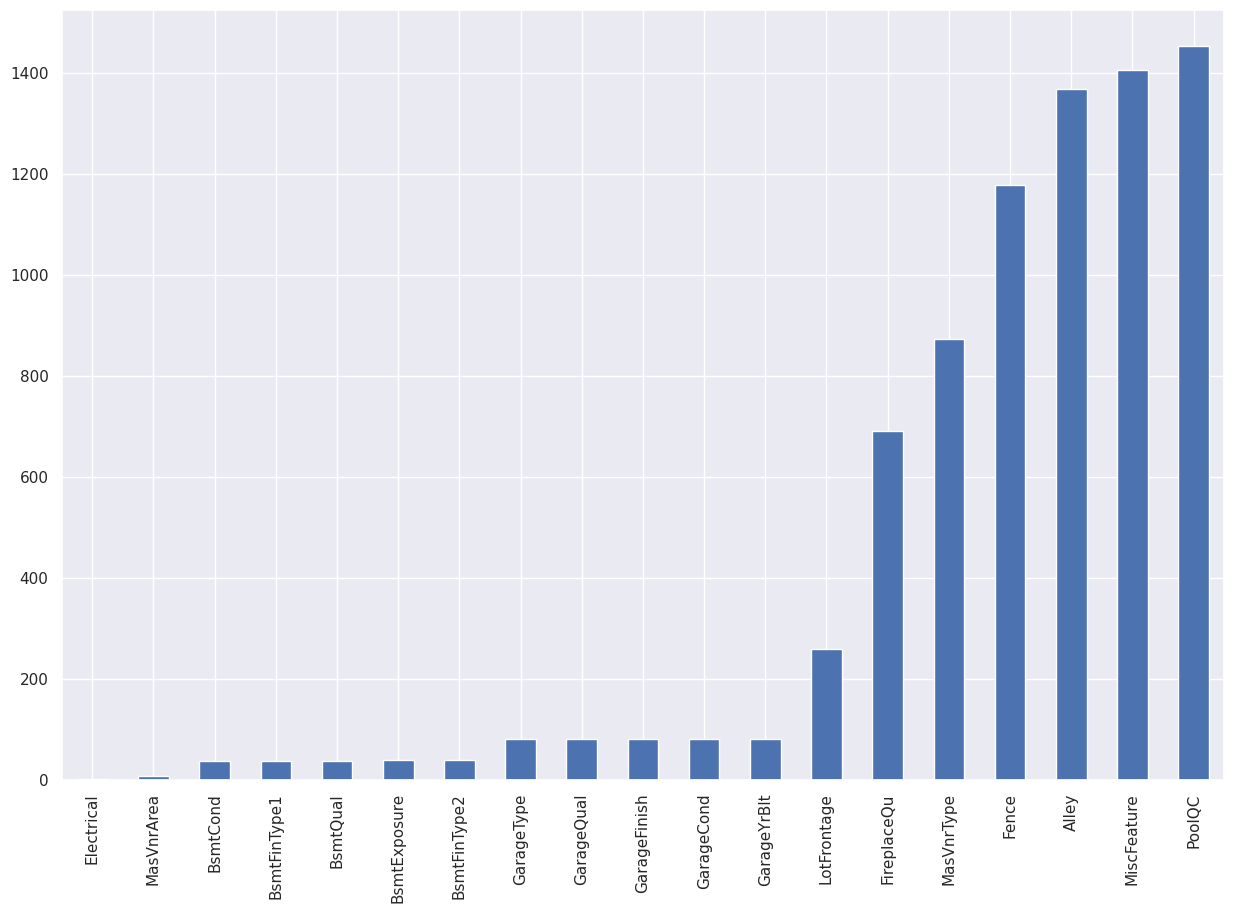

In [ ]:
missing = data.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(15,10))
missing.plot.bar()




# HISTOGRAM : SEABORN DISPLOT

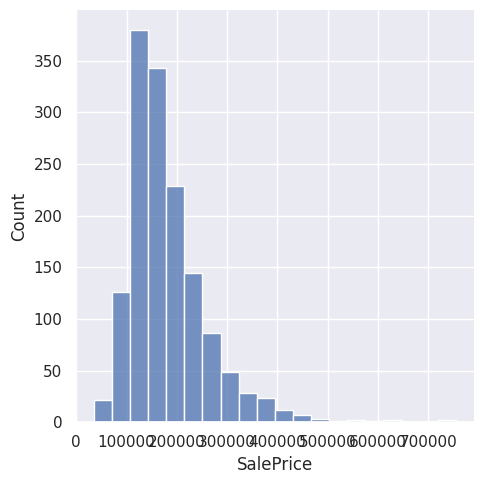

In [ ]:
sns.set(rc={'figure.figsize':(14,12)})
sns.displot(data['SalePrice'],bins=20);

<Axes: xlabel='SalePrice', ylabel='Density'>

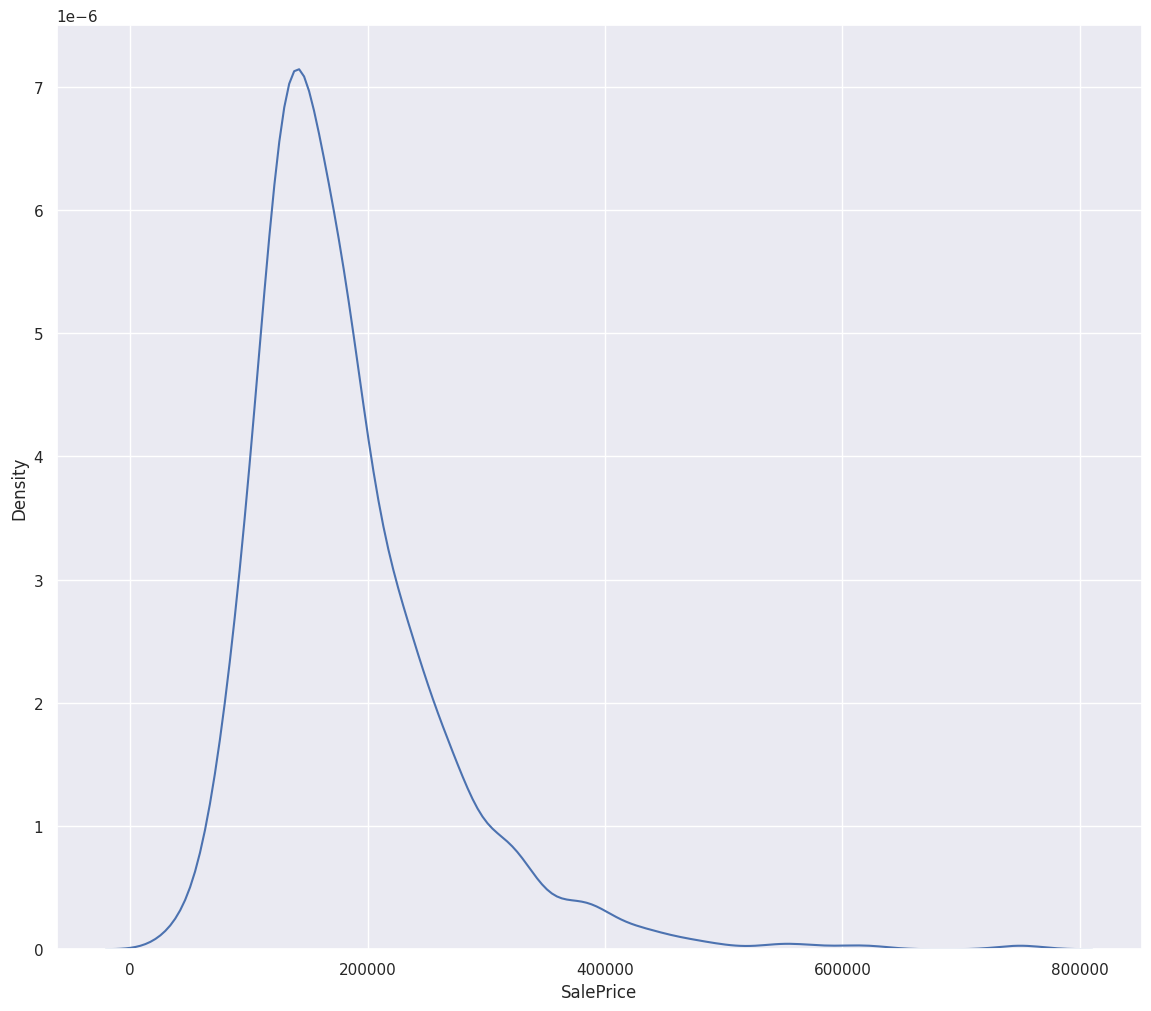

In [ ]:
sns.kdeplot(data['SalePrice'])

In [ ]:
data['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


# CORRELATION HEATMAP

In [ ]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
categorical_features = data.select_dtypes(include=[object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<Axes: title={'center': 'Correlation of Numeric Features with Sale Price'}>

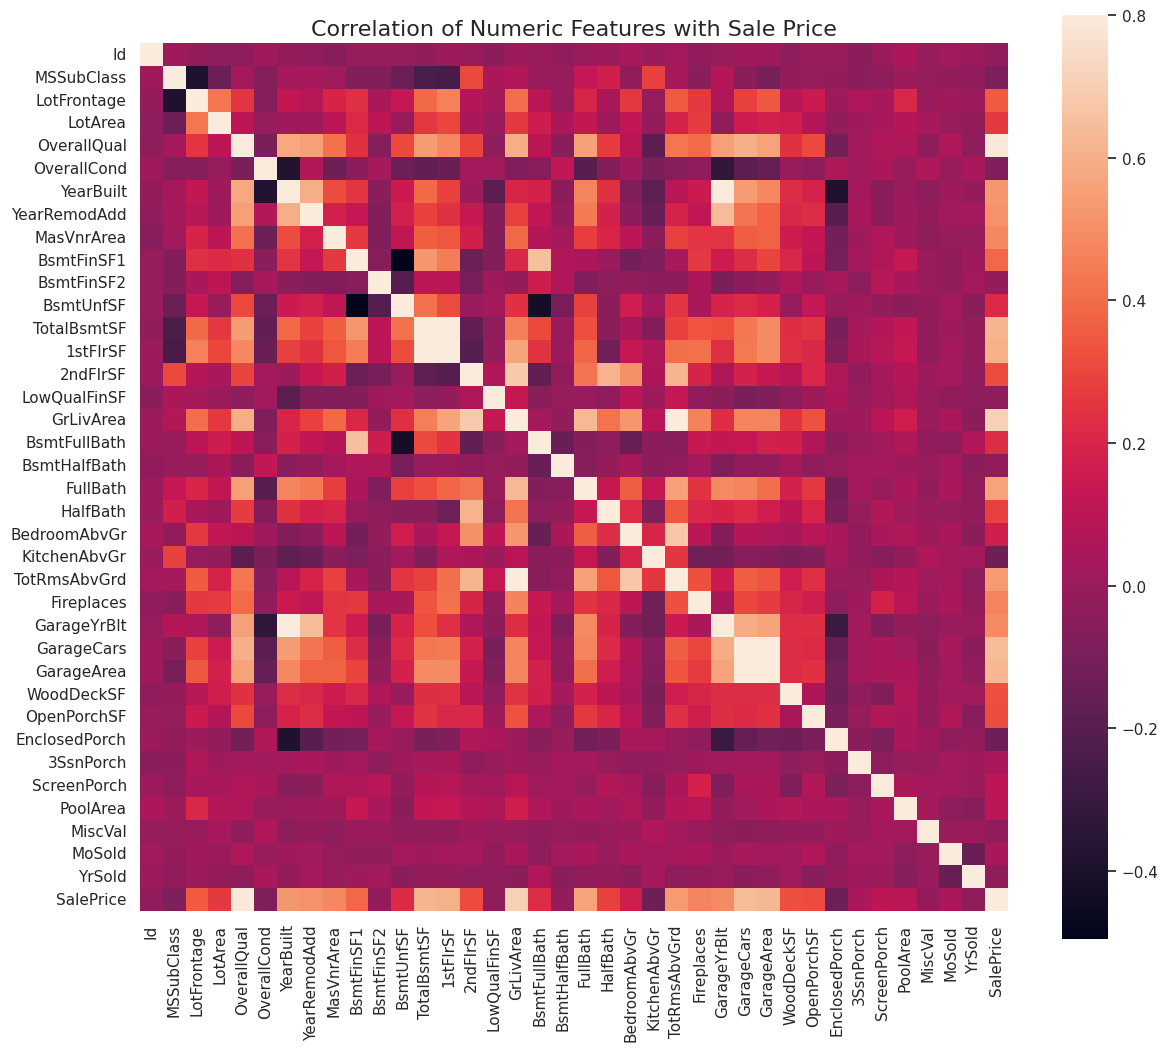

In [ ]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price' ,y=1,size=16)
sns.heatmap(correlation,square = True, vmax=0.8)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<Axes: >

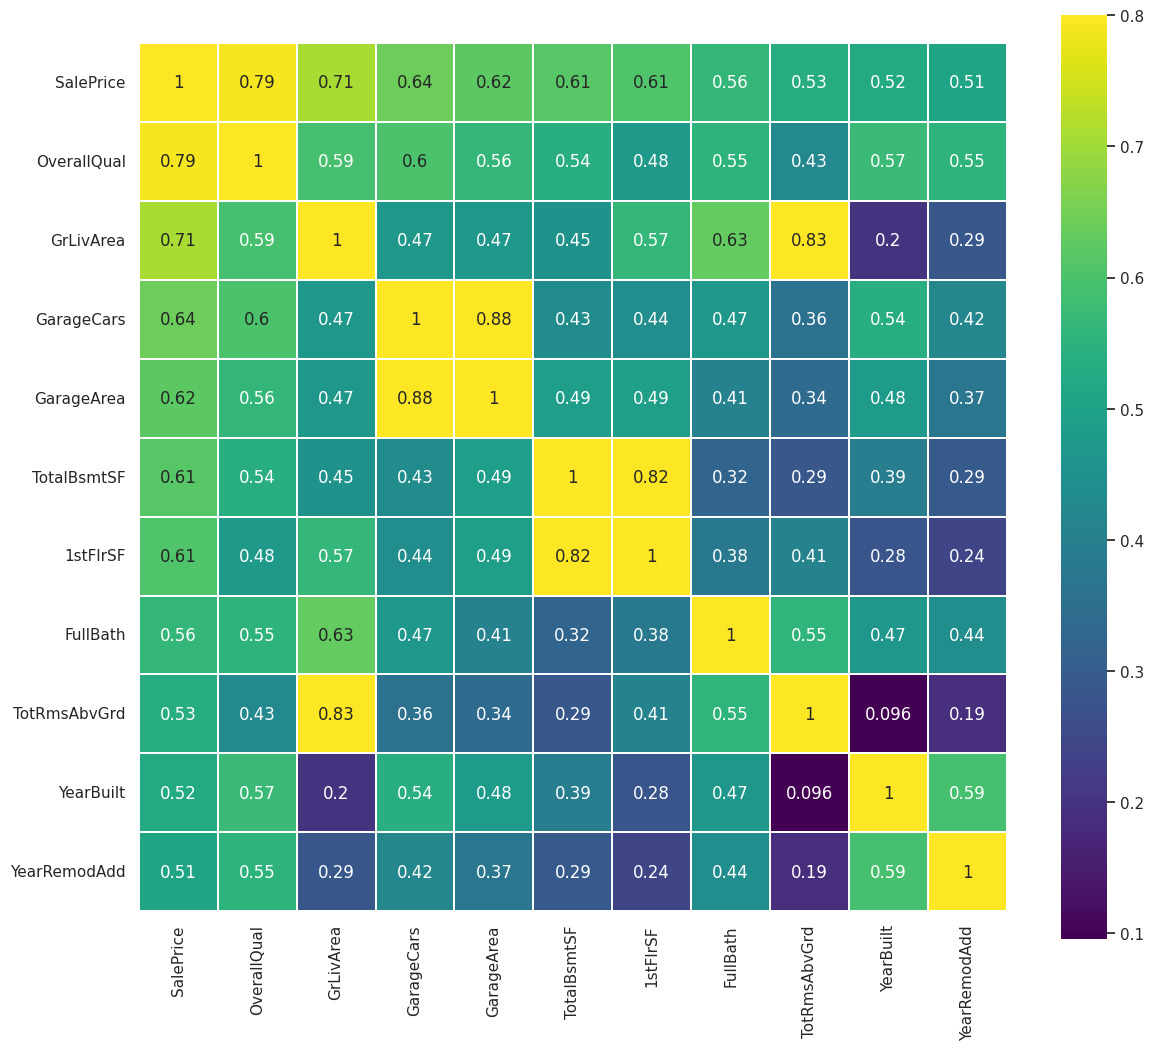

In [ ]:
k=11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white",xticklabels=cols.values ,annot_kws={'size':12},yticklabels=cols.values)

# SCATTERPLOT USING SEABORN

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

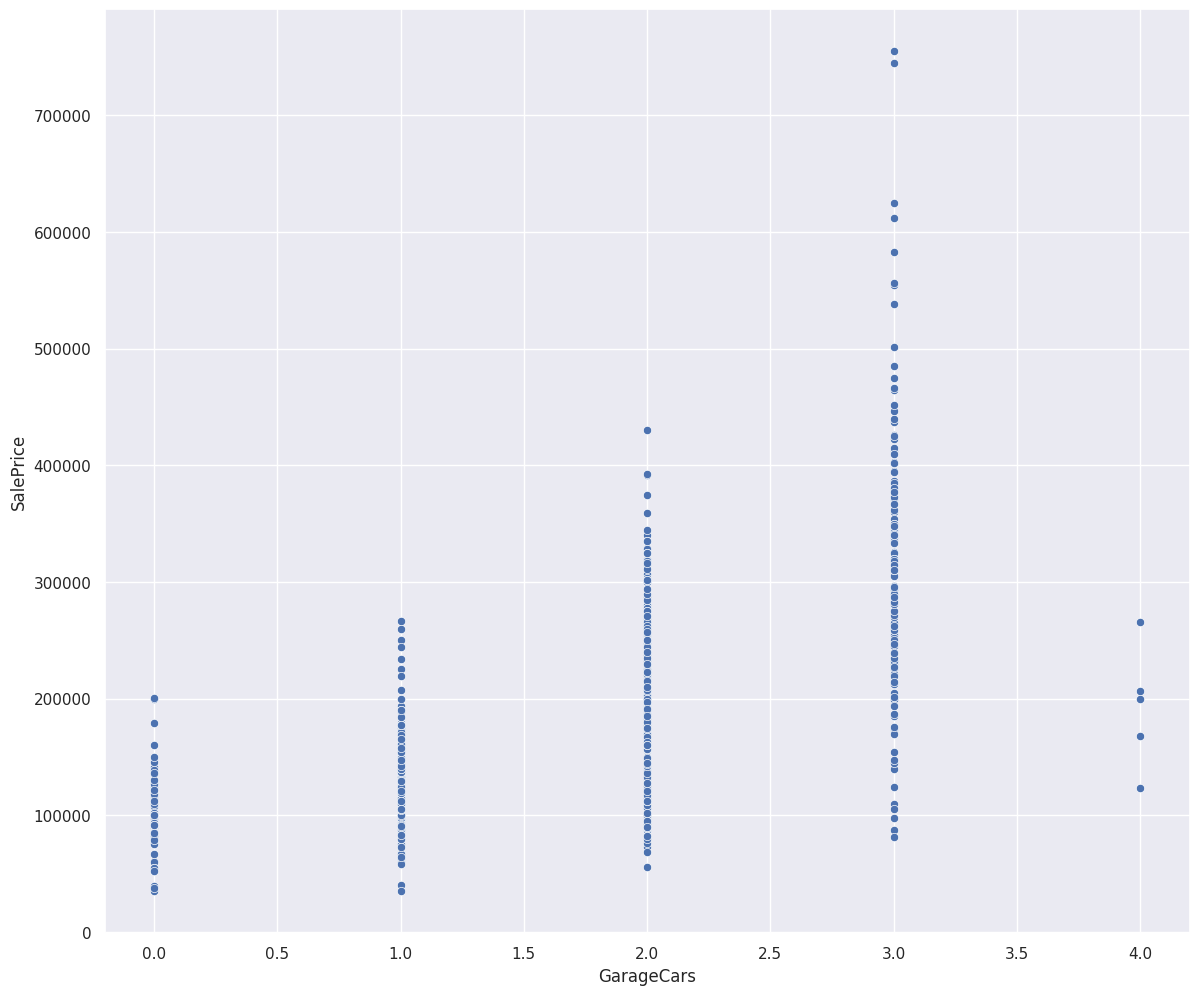

In [ ]:
sns.scatterplot(x='GarageCars',y='SalePrice',data=data)

<Axes: xlabel='GarageCars', ylabel='GarageArea'>

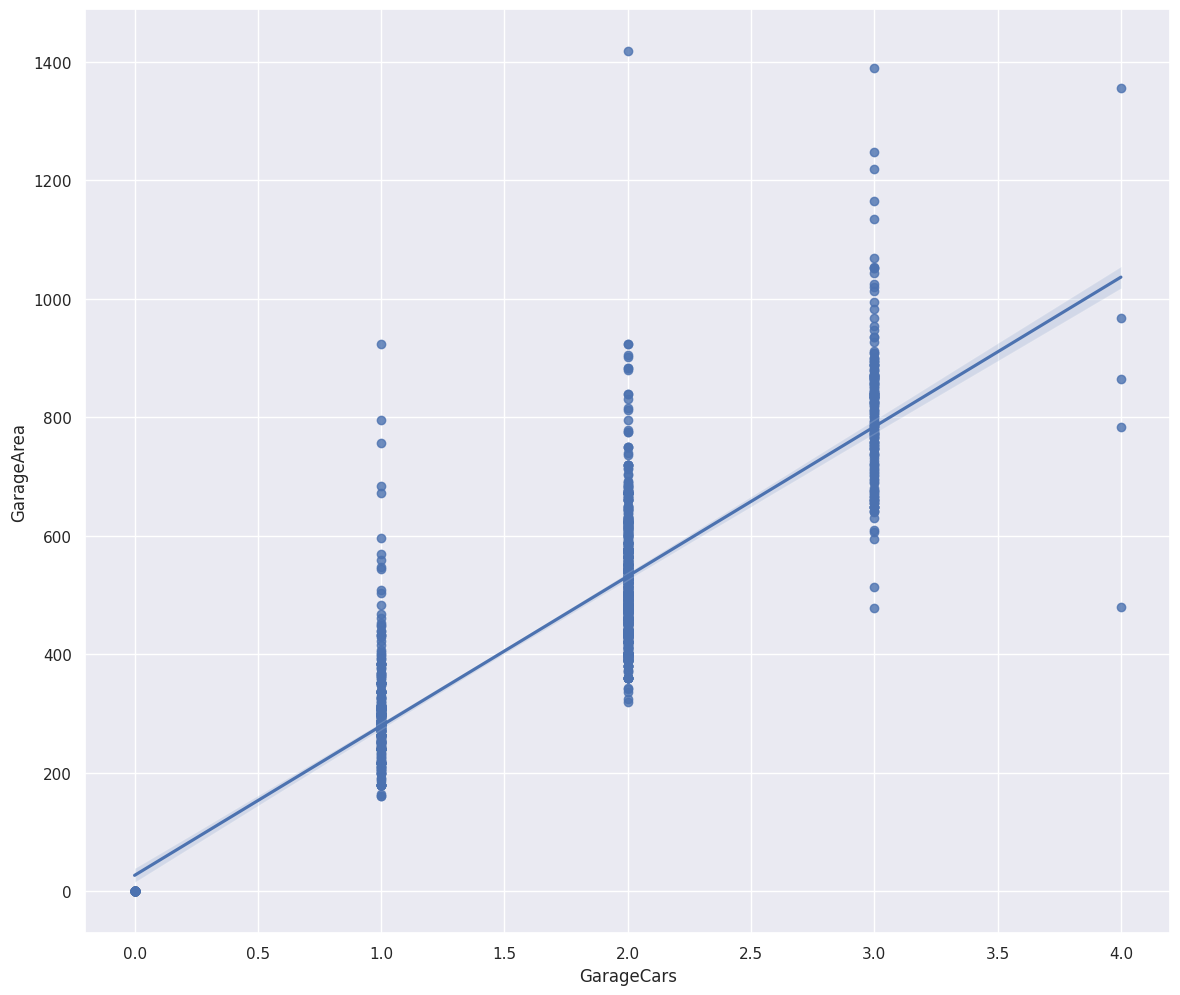

In [ ]:
sns.regplot(x='GarageCars',y='GarageArea',data = data,scatter = True, fit_reg=True)

<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

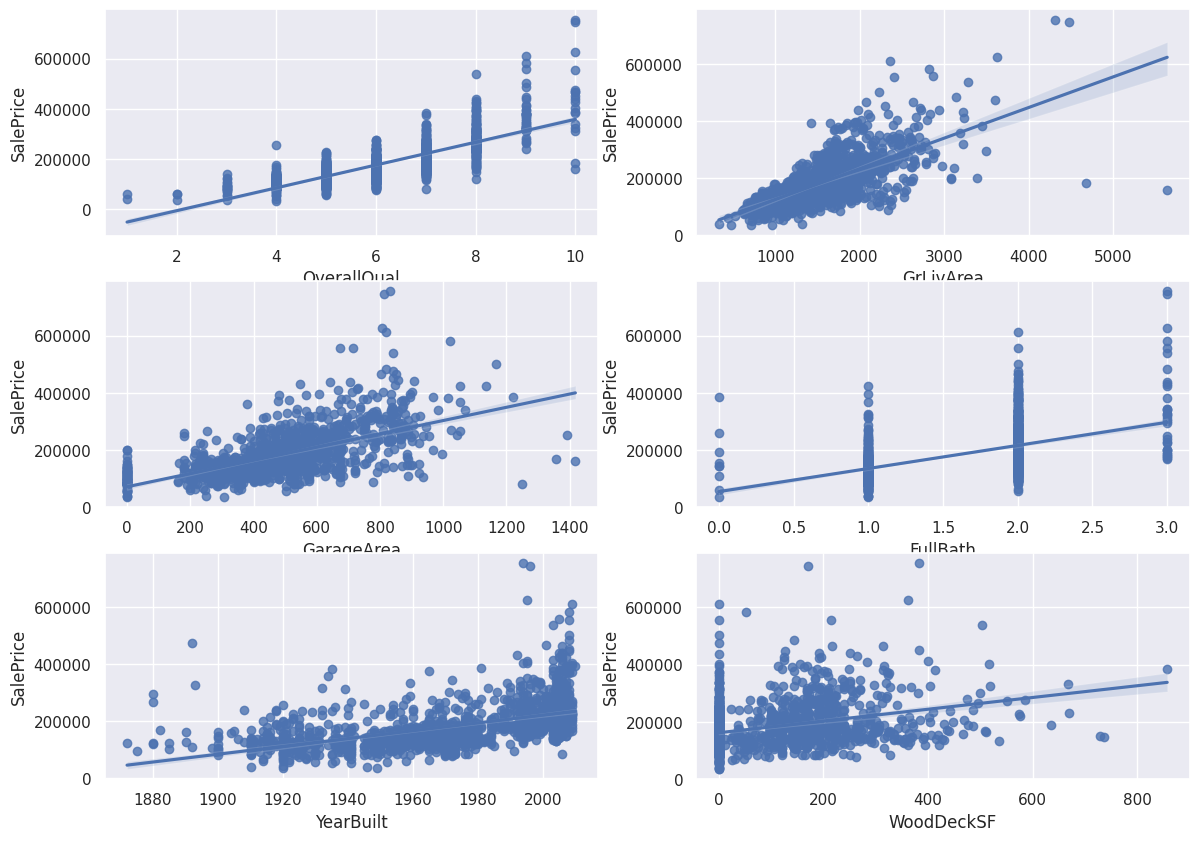

In [ ]:
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
sns.regplot(x='OverallQual',y='SalePrice',data = data,scatter=True, fit_reg=True, ax=ax1)
sns.regplot(x='GrLivArea',y='SalePrice',data = data,scatter=True, fit_reg=True, ax=ax2)
sns.regplot(x='GarageArea',y='SalePrice',data = data,scatter=True, fit_reg=True, ax=ax3)
sns.regplot(x='FullBath',y='SalePrice',data = data,scatter=True, fit_reg=True, ax=ax4)
sns.regplot(x='YearBuilt',y='SalePrice',data = data,scatter=True, fit_reg=True, ax=ax5)
sns.regplot(x='WoodDeckSF',y='SalePrice',data = data,scatter=True, fit_reg=True, ax=ax6)


# BOXPLOT USING SEABORN

<Axes: xlabel='SalePrice'>

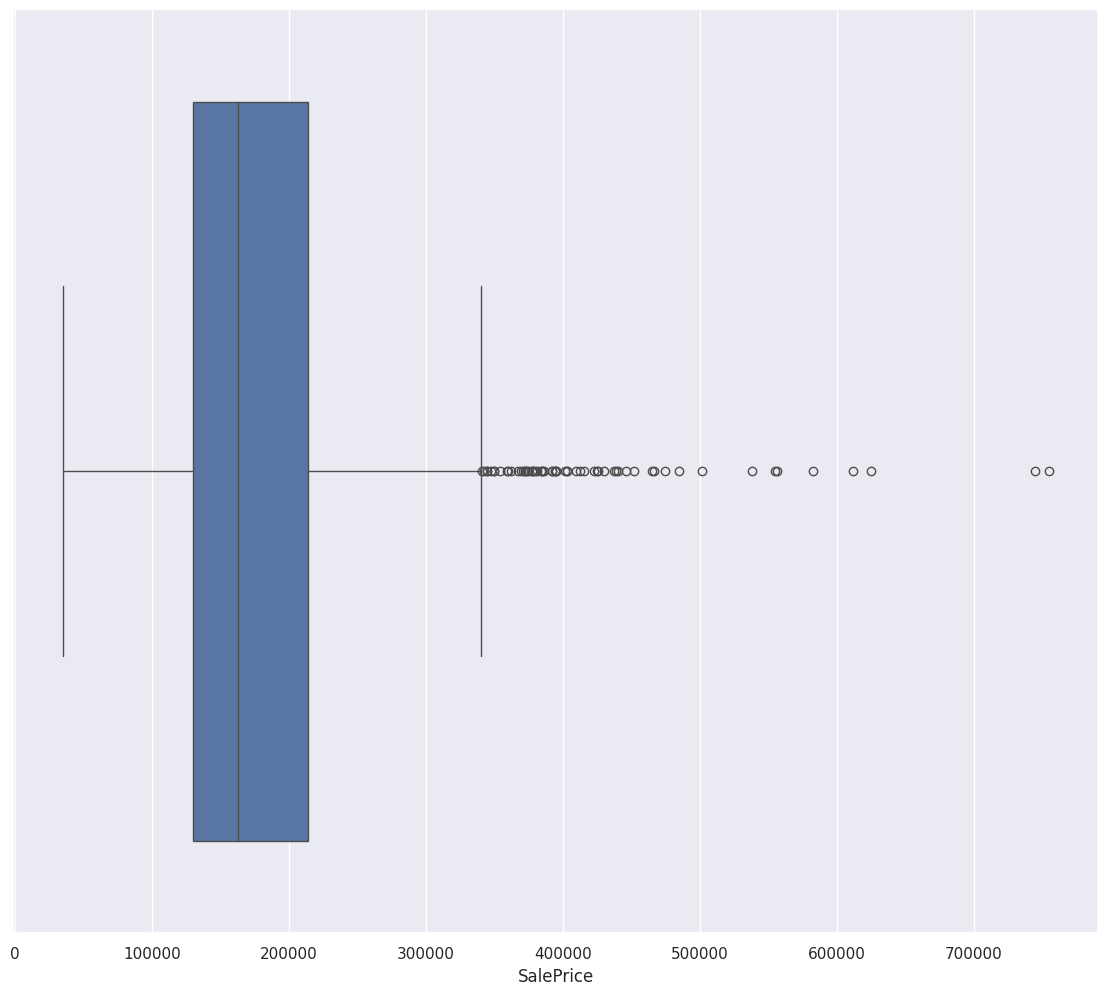

In [ ]:
sns.boxplot(x=data["SalePrice"])

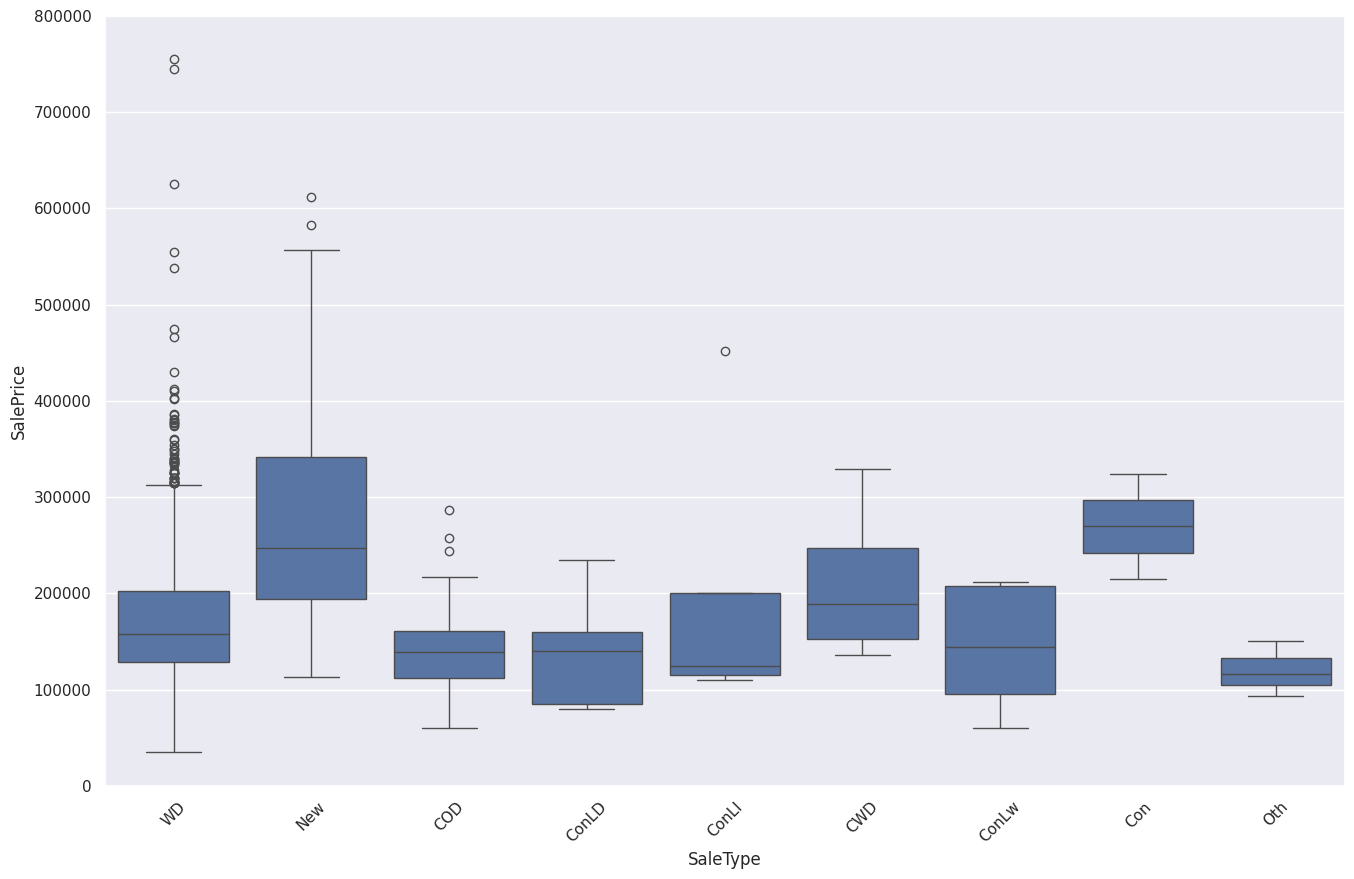

In [ ]:
f, ax = plt.subplots(figsize=(16,10))
fig = sns.boxplot(x='SaleType', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=45)

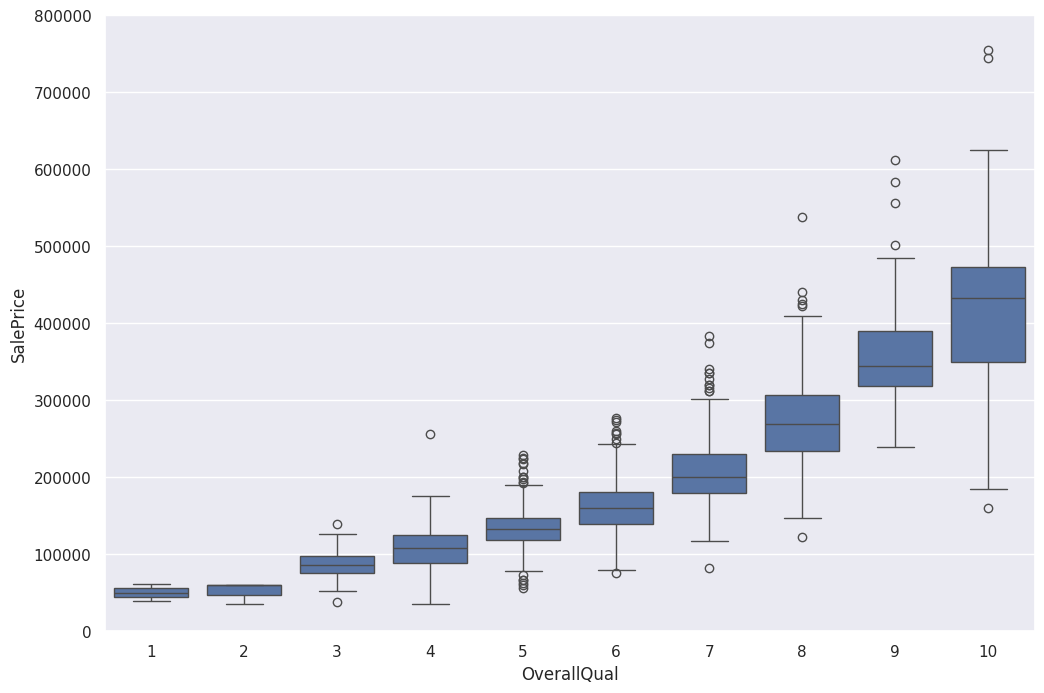

In [ ]:
f, ax = plt.subplots(figsize=(12,8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# REMOVING OUTLIERS

In [ ]:
data.shape

(1460, 81)

In [ ]:
first_quartile = data['SalePrice'].quantile(.25)
third_quartile = data['SalePrice'].quantile(.75)
IQR = third_quartile - first_quartile

In [ ]:
new_boundary = third_quartile + 3*IQR

In [ ]:
data.drop(data[data['SalePrice']>new_boundary].index,axis = 0,inplace = True)

In [ ]:
data.shape

(1448, 81)

## REMOVING BAD FEATURES FROM DATA

In [ ]:
#multicollinear features :
#1. GarageAera <-> GarageCars
#2. TotalBsmtSF <-> 1stFlrSF
#3. TotRmsAbvGrd <-> GrLivArea
#4. GrLiArea <-> FullBath
#features with missing values more than 20%:
#5. FireplaceQu   690/1460 = 47%
#6. Fence         1179/1460 = 80%
#7. Alley         1369 > 90%
#8. MiscFeature   1460 > 90%
#9. PoolQC        1453 > 90
#features with poor correlation with the target feature ( SalePrice ) :
#10. LotFrontage
#11. WoodDeckSF
#12. 2ndFlrSF
#13. OpenPorchSF
#14. HalfBath
#15. LotArea
#16. BedroomAbvGr ScreenPorch
#17. PoolArea
#18. MoSold
#19. 3SsnPorch
#20. BsmtHalfBath
#21. MiscVal
#22. id
#23. LowQualFinSF#
#24. YrSold
#25. OverallCond
#26. MSSubClass
#27. EnclosedPorch
#28. KitchenAbvGr

In [ ]:
cols_to_remove = ['BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr','ScreenPorch','PoolArea','MoSold','3SsnPorch','BsmtHalfBath','MiscVal','Id','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr','FireplaceQu','Fence','Alley','MiscFeature','PoolQC','GarageCars','1stFlrSF','GeLivArea','FullBath']



In [ ]:
#multicollinear features :
#1. GarageAera <-> GarageCars
#2. TotalBsmtSF <-> 1stFlrSF
#3. TotRmsAbvGrd <-> GrLivArea
#4. GrLiArea <-> FullBath
#features with missing values more than 20%:
#5. FireplaceQu   690/1460 = 47%
#6. Fence         1179/1460 = 80%
#7. Alley         1369 > 90%
#8. MiscFeature   1460 > 90%
#9. PoolQC        1453 > 90
#features with poor correlation with the target feature ( SalePrice ) :
#10. LotFrontage
#11. WoodDeckSF
#12. 2ndFlrSF
#13. OpenPorchSF
#14. HalfBath
#15. LotArea
#16. BedroomAbvGr ScreenPorch
#17. PoolArea
#18. MoSold
#19. 3SsnPorch
#20. BsmtHalfBath
#21. MiscVal
#22. id
#23. LowQualFinSF#
#24. YrSold
#25. OverallCond
#26. MSSubClass
#27. EnclosedPorch
#28. KitchenAbvGr

cols_to_remove = ['BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr','ScreenPorch','PoolArea','MoSold','3SsnPorch','BsmtHalfBath','MiscVal','Id','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr','FireplaceQu','Fence','Alley','MiscFeature','PoolQC','GarageCars','1stFlrSF','GeLivArea','FullBath']


columns_to_drop_existing = [col for col in cols_to_remove if col in data.columns]


data.drop(columns_to_drop_existing,axis = 1,inplace = True)